In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dense, concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import Metric
from tensorflow.keras.callbacks import Callback

import matplotlib.pyplot as plt

In [ ]:
zcr_stats = np.load("/content/speech/speech_zcr_stats.npy")
rmse_stats = np.load("/content/speech/speech_rmse_stats.npy")
mfcc_2d_padded = np.load("/content/speech/speech_mfcc_2d_padded.npy")
spectrogram_2d_padded = np.load("/content/speech/speech_spectrogram_2d_padded.npy")
labels = np.load("/content/speech/speech_labels.npy")

print("Shape of zcr_stats:", zcr_stats.shape)
print("Shape of rmse_stats:", rmse_stats.shape)
print("Shape of mfcc_2d_padded:", mfcc_2d_padded.shape)
print("Shape of spectrogram_2d_padded:", spectrogram_2d_padded.shape)
print("Shape of labels:", labels.shape)

Shape of zcr_stats: (7200, 2)
Shape of rmse_stats: (7200, 2)
Shape of mfcc_2d_padded: (7200, 216, 20)
Shape of spectrogram_2d_padded: (7200, 216, 128)
Shape of labels: (7200,)


In [ ]:
print("ZCR Stats Description:")
print(np.mean(zcr_stats, axis=0))
print(np.std(zcr_stats, axis=0))
print(np.min(zcr_stats, axis=0))
print(np.max(zcr_stats, axis=0))
print("\nRMSE Stats Description:")
print(np.mean(rmse_stats, axis=0))
print(np.std(rmse_stats, axis=0))
print(np.min(rmse_stats, axis=0))
print(np.max(rmse_stats, axis=0))
print("\nMFCC 2D Padded Description:")
print(np.mean(mfcc_2d_padded))
print(np.std(mfcc_2d_padded))
print(np.min(mfcc_2d_padded))
print(np.max(mfcc_2d_padded))
print("\nSpectrogram 2D Padded Description:")
print(np.mean(spectrogram_2d_padded))
print(np.std(spectrogram_2d_padded))
print(np.min(spectrogram_2d_padded))
print(np.max(spectrogram_2d_padded))

ZCR Stats Description:
[0.19733746 0.15323032]
[0.06536211 0.04985479]
[0.06001533 0.02888775]
[0.39854601 0.32461505]

RMSE Stats Description:
[0.01383835 0.01305772]
[0.01802423 0.01710127]
[0.00030145 0.00032967]
[0.1558197  0.13129027]

MFCC 2D Padded Description:
-13.267674174593763
85.68217273634771
-1108.560302734375
241.32080078125

Spectrogram 2D Padded Description:
-27.310340515625235
29.67746245679596
-80.0
0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler_1d = StandardScaler()
scaler_2d = StandardScaler()

# Reshape 2D data for scaling (flatten the last two dimensions temporarily)
mfcc_2d_reshaped_for_scaling = mfcc_2d_padded.reshape(mfcc_2d_padded.shape[0], -1)
spectrogram_2d_reshaped_for_scaling = spectrogram_2d_padded.reshape(spectrogram_2d_padded.shape[0], -1)

# Fit and transform 1D features
zcr_stats_scaled = scaler_1d.fit_transform(zcr_stats)
rmse_stats_scaled = scaler_1d.fit_transform(rmse_stats)

# Fit and transform 2D features
mfcc_2d_scaled_reshaped = scaler_2d.fit_transform(mfcc_2d_reshaped_for_scaling)
spectrogram_2d_scaled_reshaped = scaler_2d.fit_transform(spectrogram_2d_reshaped_for_scaling)

# Reshape 2D scaled data back to original 3D shape
mfcc_2d_scaled = mfcc_2d_scaled_reshaped.reshape(mfcc_2d_padded.shape)
spectrogram_2d_scaled = spectrogram_2d_scaled_reshaped.reshape(spectrogram_2d_padded.shape)


print("Shape of scaled zcr_stats:", zcr_stats_scaled.shape)
print("Shape of scaled rmse_stats:", rmse_stats_scaled.shape)
print("Shape of scaled mfcc_2d_padded:", mfcc_2d_scaled.shape)
print("Shape of scaled spectrogram_2d_padded:", spectrogram_2d_scaled.shape)

Shape of scaled zcr_stats: (7200, 2)
Shape of scaled rmse_stats: (7200, 2)
Shape of scaled mfcc_2d_padded: (7200, 216, 20)
Shape of scaled spectrogram_2d_padded: (7200, 216, 128)


In [ ]:
print("ZCR Stats Description:")
print(np.mean(zcr_stats_scaled, axis=0))
print(np.std(zcr_stats_scaled, axis=0))
print(np.min(zcr_stats_scaled, axis=0))
print(np.max(zcr_stats_scaled, axis=0))
print("\nRMSE Stats Description:")
print(np.mean(rmse_stats_scaled, axis=0))
print(np.std(rmse_stats_scaled, axis=0))
print(np.min(rmse_stats_scaled, axis=0))
print(np.max(rmse_stats_scaled, axis=0))
print("\nMFCC 2D Padded Description:")
print(np.mean(mfcc_2d_scaled))
print(np.std(mfcc_2d_scaled))
print(np.min(mfcc_2d_scaled))
print(np.max(mfcc_2d_scaled))
print("\nSpectrogram 2D Padded Description:")
print(np.mean(spectrogram_2d_padded))
print(np.std(spectrogram_2d_scaled))
print(np.min(spectrogram_2d_scaled))
print(np.max(spectrogram_2d_scaled))

ZCR Stats Description:
[-3.21588435e-15 -1.19621597e-14]
[1. 1.]
[-2.10094419 -2.49409449]
[3.07836693 3.43767824]

RMSE Stats Description:
[-1.1920929e-09 -2.1855036e-09]
[1.        1.0000011]
[-0.7510381  -0.74427444]
[7.877249  6.9136753]

MFCC 2D Padded Description:
-1.0102572642185786e-17
0.9977985026305911
-84.84692098125544
71.53059218465526

Spectrogram 2D Padded Description:
-27.310340515625235
0.9999999999999957
-84.84692098126129
5.650029980945039


In [ ]:
# Combine 1D features
combined_1d_features = np.concatenate((zcr_stats_scaled, rmse_stats_scaled), axis=1)

# Combine 2D features
combined_2d_features = np.concatenate((mfcc_2d_scaled, spectrogram_2d_scaled), axis=2)

# Split data into training and testing sets
(combined_1d_train, combined_1d_test,
 combined_2d_train, combined_2d_test,
 labels_train, labels_test) = train_test_split(combined_1d_features,
                                               combined_2d_features,
                                               labels,
                                               test_size=0.2,
                                               random_state=42,
                                               stratify=labels)

# Reshape 2D data to include a channel dimension
combined_2d_train_reshaped = np.expand_dims(combined_2d_train, axis=-1)
combined_2d_test_reshaped = np.expand_dims(combined_2d_test, axis=-1)

print("Shape of combined_1d_train:", combined_1d_train.shape)
print("Shape of combined_1d_test:", combined_1d_test.shape)
print("Shape of combined_2d_train_reshaped:", combined_2d_train_reshaped.shape)
print("Shape of combined_2d_test_reshaped:", combined_2d_test_reshaped.shape)
print("Shape of labels_train:", labels_train.shape)
print("Shape of labels_test:", labels_test.shape)

Shape of combined_1d_train: (5760, 4)
Shape of combined_1d_test: (1440, 4)
Shape of combined_2d_train_reshaped: (5760, 216, 148, 1)
Shape of combined_2d_test_reshaped: (1440, 216, 148, 1)
Shape of labels_train: (5760,)
Shape of labels_test: (1440,)


In [ ]:
# Define input shapes
input_shape_1d = (combined_1d_train.shape[1],)
input_shape_2d = combined_2d_train_reshaped.shape[1:]

# 1D CNN branch
input_1d = Input(shape=input_shape_1d, name='input_1d')
x = Dense(64, activation='relu')(input_1d) # Using Dense for simple 1D features
x = Dropout(0.305)(x) # Slightly increased Dropout
x = Dense(32, activation='relu')(x)
x = Dropout(0.305)(x) # Slightly increased Dropout
flat_1d = Flatten()(x) # Flatten the output of the Dense layers

# 2D CNN branch
input_2d = Input(shape=input_shape_2d, name='input_2d')
y = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_2d)
y = MaxPooling2D(pool_size=(2, 2))(y)
y = Dropout(0.165)(y) # Slightly increased Dropout
y = Conv2D(64, kernel_size=(3, 3), activation='relu')(y)
y = MaxPooling2D(pool_size=(2, 2))(y)
y = Dropout(0.165)(y) # Slightly increased Dropout
flat_2d = Flatten()(y)

# Concatenate branches
combined = concatenate([flat_1d, flat_2d])

# Fully connected layers
z = Dense(128, activation='relu')(combined)
z = Dropout(0.305)(z) # Slightly increased Dropout
z = Dense(64, activation='relu')(z)
z = Dropout(0.305)(z) # Slightly increased Dropout

# Output layer (assuming 8 emotion classes based on common datasets)
output_layer = Dense(len(np.unique(labels)), activation='softmax')(z)

# Create the model
model = Model(inputs=[input_1d, input_2d], outputs=output_layer)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_2d            │ (None, 216, 148,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 214, 146,  │        320 │ input_2d[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_1d            │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 107, 73,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │        320 │ input_1d[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 107, 73,   │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 105, 71,   │     18,496 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 52, 35,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 52, 35,    │          0 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 32)        │          0 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 116480)    │          0 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 116512)    │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │ 14,913,664 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 7)         │        455 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 14,943,591 (57.01 MB)

 Trainable params: 14,943,591 (57.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
num_classes = len(np.unique(labels)) # Get the number of unique classes from your labels
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # Removed F1Score metric from here

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_2d            │ (None, 216, 148,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 214, 146,  │        320 │ input_2d[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_1d            │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 107, 73,   │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │        320 │ input_1d[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 107, 73,   │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 105, 71,   │     18,496 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 52, 35,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 52, 35,    │          0 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 32)        │          0 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 116480)    │          0 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 116512)    │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │ 14,913,664 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 7)         │        455 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 14,943,591 (57.01 MB)

 Trainable params: 14,943,591 (57.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class F1ScoreCallback(Callback):
    def __init__(self, train_data, validation_data):
        super().__init__()
        self.train_data = train_data
        self.validation_data = validation_data
        self.train_f1_scores = []
        self.val_f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        # Calculate F1 score on training data
        y_train_pred_probs = self.model.predict(self.train_data[0])
        y_train_pred = np.argmax(y_train_pred_probs, axis=1)
        train_f1 = f1_score(self.train_data[1], y_train_pred, average='macro') # Use macro average for multi-class
        self.train_f1_scores.append(train_f1)
        logs['f1_score'] = train_f1 # Add to logs for potential display during training

        # Calculate F1 score on validation data
        y_val_pred_probs = self.model.predict(self.validation_data[0])
        y_val_pred = np.argmax(y_val_pred_probs, axis=1)
        val_f1 = f1_score(self.validation_data[1], y_val_pred, average='macro') # Use macro average for multi-class
        self.val_f1_scores.append(val_f1)
        logs['val_f1_score'] = val_f1 # Add to logs for potential display during training

        print(f"Epoch {epoch+1}: Train F1 = {train_f1:.4f}, Val F1 = {val_f1:.4f}")

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training and testing labels
labels_train_encoded = label_encoder.fit_transform(labels_train)
labels_test_encoded = label_encoder.transform(labels_test)

# Instantiate the custom F1ScoreCallback
f1_callback = F1ScoreCallback(train_data=([combined_1d_train, combined_2d_train_reshaped], labels_train_encoded),
                              validation_data=([combined_1d_test, combined_2d_test_reshaped], labels_test_encoded))

history = model.fit(
    [combined_1d_train, combined_2d_train_reshaped],
    labels_train_encoded,
    epochs=25, # Increased epochs
    batch_size=32,
    validation_data=([combined_1d_test, combined_2d_test_reshaped], labels_test_encoded),
    callbacks=[f1_callback] # Add the callback here
)

Epoch 1/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Epoch 1: Train F1 = 0.1386, Val F1 = 0.1430
180/180 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - accuracy: 0.2173 - loss: 2.2403 - val_accuracy: 0.3028 - val_loss: 1.6855 - f1_score: 0.1386 - val_f1_score: 0.1430
Epoch 2/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Epoch 2: Train F1 = 0.5511, Val F1 = 0.5235
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.3382 - loss: 1.6395 - val_accuracy: 0.5639 - val_loss: 1.2456 - f1_score: 0.5511 - val_f1_score: 0.5235
Epoch 3/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Epoch 3: Train F1 = 0.7605, Val F1 = 0.6558
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - accuracy: 0.5562 - loss: 1.1957 - val_accuracy: 0.6701 - val_loss: 0.9434 - f1_score: 0.7605 - val_f1_score: 0.6558
Epoch 4/25
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Epoch 4: Train F1 = 0

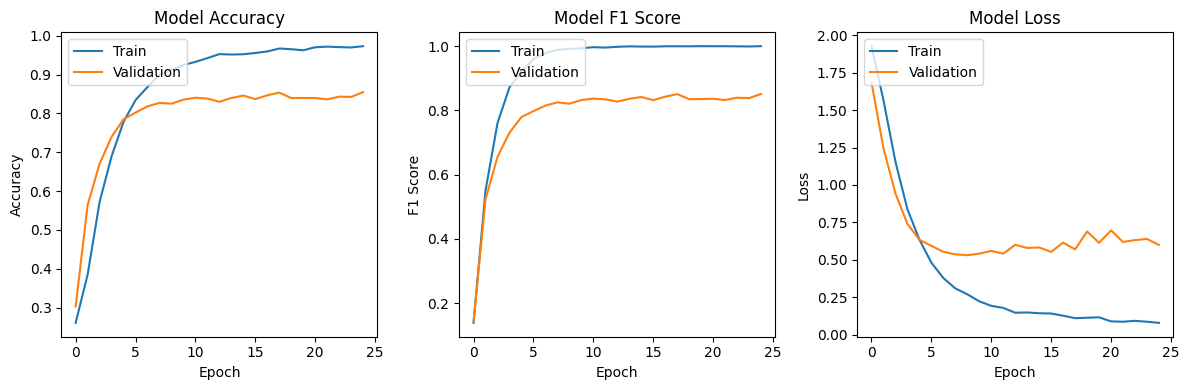

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 3, 1) # Changed to 1 row, 3 columns
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot F1 score
plt.subplot(1, 3, 2) # Changed to 1 row, 3 columns
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
plt.subplot(1, 3, 3) # Added a new subplot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.tight_layout()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(
    [combined_1d_test, combined_2d_test_reshaped],
    labels_test_encoded,
    verbose=0
)

# Predict on the test set to calculate F1 score
y_pred_probs = model.predict([combined_1d_test, combined_2d_test_reshaped])
y_pred = np.argmax(y_pred_probs, axis=1)
test_f1_score = f1_score(labels_test_encoded, y_pred, average='macro')

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {test_f1_score:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Test Loss: 0.5991
Test Accuracy: 0.8549
Test F1 Score: 0.8509


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


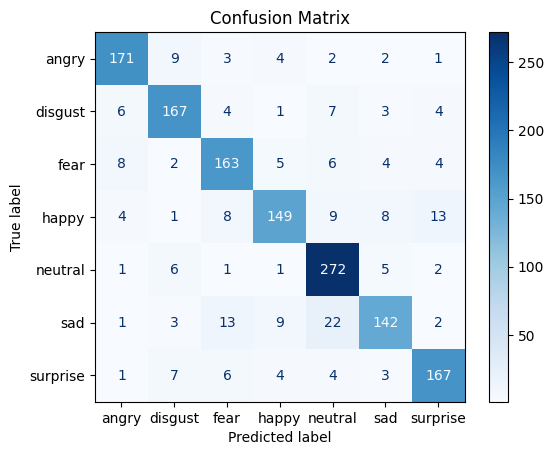

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get predictions on the test set
y_pred_probs = model.predict([combined_1d_test, combined_2d_test_reshaped])
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(labels_test_encoded, y_pred)

# Get the class labels (assuming they are 0 to num_classes-1)
class_labels = label_encoder.classes_

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the entire model
model.save('speech_rec_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [ ]:
song_zcr_stats = np.load("/content/song/song_zcr_stats.npy")
song_rmse_stats = np.load("/content/song/song_rmse_stats.npy")
song_mfcc_2d_padded = np.load("/content/song/song_mfcc_2d_padded.npy")
song_chroma_2d_padded = np.load("/content/song/song_chroma_2d_padded.npy")
song_labels = np.load("/content/song/song_labels.npy")

print("Shape of song_zcr_stats:", song_zcr_stats.shape)
print("Shape of song_rmse_stats:", song_rmse_stats.shape)
print("Shape of song_mfcc_2d_padded:", song_mfcc_2d_padded.shape)
print("Shape of song_chroma_2d_padded:", song_chroma_2d_padded.shape)
print("Shape of song_labels:", song_labels.shape)

Shape of song_zcr_stats: (5060, 2)
Shape of song_rmse_stats: (5060, 2)
Shape of song_mfcc_2d_padded: (5060, 216, 20)
Shape of song_chroma_2d_padded: (5060, 216, 12)
Shape of song_labels: (5060,)


In [ ]:
print("ZCR Stats Description:")
print(np.mean(song_zcr_stats, axis=0))
print(np.std(song_zcr_stats, axis=0))
print(np.min(song_zcr_stats, axis=0))
print(np.max(song_zcr_stats, axis=0))
print("\nRMSE Stats Description:")
print(np.mean(song_rmse_stats, axis=0))
print(np.std(song_rmse_stats, axis=0))
print(np.min(song_rmse_stats, axis=0))
print(np.max(song_rmse_stats, axis=0))
print("\nMFCC 2D Padded Description:")
print(np.mean(song_mfcc_2d_padded))
print(np.std(song_mfcc_2d_padded))
print(np.min(song_mfcc_2d_padded))
print(np.max(song_mfcc_2d_padded))
print("\nChroma 2D Padded Description:")
print(np.mean(song_chroma_2d_padded))
print(np.std(song_chroma_2d_padded))
print(np.min(song_chroma_2d_padded))
print(np.max(song_chroma_2d_padded))

ZCR Stats Description:
[0.16488837 0.14017469]
[0.04358773 0.04181931]
[0.05906269 0.03738868]
[0.34892216 0.28435626]

RMSE Stats Description:
[0.0209272  0.01512051]
[0.01617771 0.01258761]
[0.00159147 0.00120322]
[0.11132175 0.09224775]

MFCC 2D Padded Description:
-12.462899524575914
73.03545793079017
-952.0279541015625
219.72256469726562

Chroma 2D Padded Description:
0.16024178579188064
0.2873553750039279
0.0
1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler_1d_song = StandardScaler()
scaler_2d_song = StandardScaler()

# Reshape 2D song data for scaling (flatten the last two dimensions temporarily)
song_mfcc_2d_reshaped_for_scaling = song_mfcc_2d_padded.reshape(song_mfcc_2d_padded.shape[0], -1)
song_chroma_2d_reshaped_for_scaling = song_chroma_2d_padded.reshape(song_chroma_2d_padded.shape[0], -1)


# Fit and transform 1D song features
song_zcr_stats_scaled = scaler_1d_song.fit_transform(song_zcr_stats)
song_rmse_stats_scaled = scaler_1d_song.fit_transform(song_rmse_stats)

# Fit and transform 2D song features
song_mfcc_2d_scaled_reshaped = scaler_2d_song.fit_transform(song_mfcc_2d_reshaped_for_scaling)
song_chroma_2d_scaled_reshaped = scaler_2d_song.fit_transform(song_chroma_2d_reshaped_for_scaling)

# Reshape 2D scaled song data back to original 3D shape
song_mfcc_2d_scaled = song_mfcc_2d_scaled_reshaped.reshape(song_mfcc_2d_padded.shape)
song_chroma_2d_scaled = song_chroma_2d_scaled_reshaped.reshape(song_chroma_2d_padded.shape)

print("Shape of scaled song_zcr_stats:", song_zcr_stats_scaled.shape)
print("Shape of scaled song_rmse_stats:", song_rmse_stats_scaled.shape)
print("Shape of scaled song_mfcc_2d_padded:", song_mfcc_2d_scaled.shape)
print("Shape of scaled song_chroma_2d_padded:", song_chroma_2d_scaled.shape)

Shape of scaled song_zcr_stats: (5060, 2)
Shape of scaled song_rmse_stats: (5060, 2)
Shape of scaled song_mfcc_2d_padded: (5060, 216, 20)
Shape of scaled song_chroma_2d_padded: (5060, 216, 12)


In [ ]:
print("ZCR Stats Description:")
print(np.mean(song_zcr_stats_scaled, axis=0))
print(np.std(song_zcr_stats_scaled, axis=0))
print(np.min(song_zcr_stats_scaled, axis=0))
print(np.max(song_zcr_stats_scaled, axis=0))
print("\nRMSE Stats Description:")
print(np.mean(song_rmse_stats_scaled, axis=0))
print(np.std(song_rmse_stats_scaled, axis=0))
print(np.min(song_rmse_stats_scaled, axis=0))
print(np.max(song_rmse_stats_scaled, axis=0))
print("\nMFCC 2D Padded Description:")
print(np.mean(song_mfcc_2d_scaled))
print(np.std(song_mfcc_2d_scaled))
print(np.min(song_mfcc_2d_scaled))
print(np.max(song_mfcc_2d_scaled))
print("\nChroma 2D Padded Description:")
print(np.mean(song_chroma_2d_scaled))
print(np.std(song_chroma_2d_scaled))
print(np.min(song_chroma_2d_scaled))
print(np.max(song_chroma_2d_scaled))

ZCR Stats Description:
[ 8.06068404e-15 -1.19782971e-14]
[1. 1.]
[-2.4278776  -2.45785988]
[4.22214696 3.44772702]

RMSE Stats Description:
[ 5.9015668e-09 -3.3842717e-08]
[0.99999976 0.9999995 ]
[-1.1952074 -1.1056348]
[5.5875993 6.1272335]

MFCC 2D Padded Description:
-1.6235813097343676e-17
1.0000000000000002
-70.94567889555327
64.6989776950206

Chroma 2D Padded Description:
-1.4116160974669027e-17
1.0
-2.4559826948764805
68.73227286208642


In [ ]:
# Combine 1D features
combined_1d_song_features = np.concatenate((song_zcr_stats_scaled, song_rmse_stats_scaled), axis=1)

# Combine 2D features
combined_2d_song_features = np.concatenate((song_mfcc_2d_scaled, song_chroma_2d_scaled), axis=2)

# Split data into training and testing sets
(combined_1d_song_train, combined_1d_song_test,
 combined_2d_song_train, combined_2d_song_test,
 song_labels_train, song_labels_test) = train_test_split(combined_1d_song_features,
                                                        combined_2d_song_features,
                                                        song_labels,
                                                        test_size=0.2,
                                                        random_state=42,
                                                        stratify=song_labels)

# Reshape 2D data to include a channel dimension
combined_2d_song_train_reshaped = np.expand_dims(combined_2d_song_train, axis=-1)
combined_2d_song_test_reshaped = np.expand_dims(combined_2d_song_test, axis=-1)

print("Shape of combined_1d_song_train:", combined_1d_song_train.shape)
print("Shape of combined_1d_song_test:", combined_1d_song_test.shape)
print("Shape of combined_2d_song_train_reshaped:", combined_2d_song_train_reshaped.shape)
print("Shape of combined_2d_song_test_reshaped:", combined_2d_song_test_reshaped.shape)
print("Shape of song_labels_train:", song_labels_train.shape)
print("Shape of song_labels_test:", song_labels_test.shape)

Shape of combined_1d_song_train: (4048, 4)
Shape of combined_1d_song_test: (1012, 4)
Shape of combined_2d_song_train_reshaped: (4048, 216, 32, 1)
Shape of combined_2d_song_test_reshaped: (1012, 216, 32, 1)
Shape of song_labels_train: (4048,)
Shape of song_labels_test: (1012,)


In [ ]:
# Define input shapes for song data
input_shape_1d_song = (combined_1d_song_train.shape[1],)
input_shape_2d_song = combined_2d_song_train_reshaped.shape[1:]

# 1D CNN branch for song data
input_1d_song = Input(shape=input_shape_1d_song, name='input_1d_song')
x_song = Dense(64, activation='relu')(input_1d_song)
x_song = Dropout(0.305)(x_song)
x_song = Dense(32, activation='relu')(x_song)
x_song = Dropout(0.305)(x_song)
flat_1d_song = Flatten()(x_song)

# 2D CNN branch for song data
input_2d_song = Input(shape=input_shape_2d_song, name='input_2d_song')
y_song = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_2d_song)
y_song = MaxPooling2D(pool_size=(2, 2))(y_song)
y_song = Dropout(0.165)(y_song)
y_song = Conv2D(64, kernel_size=(3, 3), activation='relu')(y_song)
y_song = MaxPooling2D(pool_size=(2, 2))(y_song)
y_song = Dropout(0.165)(y_song)
flat_2d_song = Flatten()(y_song)

# Concatenate branches for song data
combined_song = concatenate([flat_1d_song, flat_2d_song])

# Fully connected layers for song data
z_song = Dense(128, activation='relu')(combined_song)
z_song = Dropout(0.305)(z_song)
z_song = Dense(64, activation='relu')(z_song)
z_song = Dropout(0.305)(z_song)

# Output layer for song data (using the number of unique song labels)
output_layer_song = Dense(len(np.unique(song_labels)), activation='softmax')(z_song)

# Create the model for song data
song_model = Model(inputs=[input_1d_song, input_2d_song], outputs=output_layer_song)

song_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_2d_song       │ (None, 216, 32,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 214, 30,   │        320 │ input_2d_song[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_1d_song       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 107, 15,   │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │        320 │ input_1d_song[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 107, 15,   │          0 │ max_pooling2d_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 105, 13,   │     18,496 │ dropout_8[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,080 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 52, 6, 64) │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 32)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 52, 6, 64) │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 32)        │          0 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 19968)     │          0 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 20000)     │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │  2,560,128 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 128)       │          0 │ dense_7[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      8,256 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ dense_8[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 5)         │        325 │ dropout_11[0][0]

 Total params: 2,589,925 (9.88 MB)

 Trainable params: 2,589,925 (9.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the song model
song_model.compile(optimizer=Adam(),
                   loss=SparseCategoricalCrossentropy(),
                   metrics=['accuracy'])

song_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_2d_song       │ (None, 216, 32,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 214, 30,   │        320 │ input_2d_song[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_1d_song       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 107, 15,   │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │        320 │ input_1d_song[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 107, 15,   │          0 │ max_pooling2d_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 105, 13,   │     18,496 │ dropout_8[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,080 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 52, 6, 64) │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 32)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 52, 6, 64) │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 32)        │          0 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 19968)     │          0 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 20000)     │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │  2,560,128 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 128)       │          0 │ dense_7[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │      8,256 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ dense_8[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 5)         │        325 │ dropout_11[0][0]

 Total params: 2,589,925 (9.88 MB)

 Trainable params: 2,589,925 (9.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Initialize LabelEncoder
label_encoder_song = LabelEncoder()

# Fit and transform the training and testing labels
song_labels_train_encoded = label_encoder_song.fit_transform(song_labels_train)
song_labels_test_encoded = label_encoder_song.transform(song_labels_test)

# Instantiate the custom F1ScoreCallback
f1_callback_song = F1ScoreCallback(train_data=([combined_1d_song_train, combined_2d_song_train_reshaped], song_labels_train_encoded),
                                   validation_data=([combined_1d_song_test, combined_2d_song_test_reshaped], song_labels_test_encoded))

# Train the song model
song_history = song_model.fit(
    [combined_1d_song_train, combined_2d_song_train_reshaped],
    song_labels_train_encoded,
    epochs=25, # Increased epochs
    batch_size=32,
    validation_data=([combined_1d_song_test, combined_2d_song_test_reshaped], song_labels_test_encoded),
    callbacks=[f1_callback_song] # Add the callback here
)

Epoch 1/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1: Train F1 = 0.6000, Val F1 = 0.5848
127/127 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.3118 - loss: 1.5689 - val_accuracy: 0.6057 - val_loss: 1.0576 - f1_score: 0.6000 - val_f1_score: 0.5848
Epoch 2/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 2: Train F1 = 0.7514, Val F1 = 0.7059
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5796 - loss: 1.0820 - val_accuracy: 0.7223 - val_loss: 0.7341 - f1_score: 0.7514 - val_f1_score: 0.7059
Epoch 3/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 3: Train F1 = 0.8274, Val F1 = 0.7542
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7077 - loss: 0.7766 - val_accuracy: 0.7619 - val_loss: 0.6346 - f1_score: 0.8274 - val_f1_score: 0.7542
Epoch 4/25
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Epoch 4: Train F1 = 0.

In [ ]:
song_loss, song_accuracy = song_model.evaluate(
    [combined_1d_song_test, combined_2d_song_test_reshaped],
    song_labels_test_encoded,
    verbose=0
)

song_y_pred_probs = song_model.predict([combined_1d_song_test, combined_2d_song_test_reshaped])
song_y_pred = np.argmax(song_y_pred_probs, axis=1)
song_test_f1_score = f1_score(song_labels_test_encoded, song_y_pred, average='macro')

print(f"Song Test Loss: {song_loss:.4f}")
print(f"Song Test Accuracy: {song_accuracy:.4f}")
print(f"Song Test F1 Score: {song_test_f1_score:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Song Test Loss: 0.4053
Song Test Accuracy: 0.8982
Song Test F1 Score: 0.8940


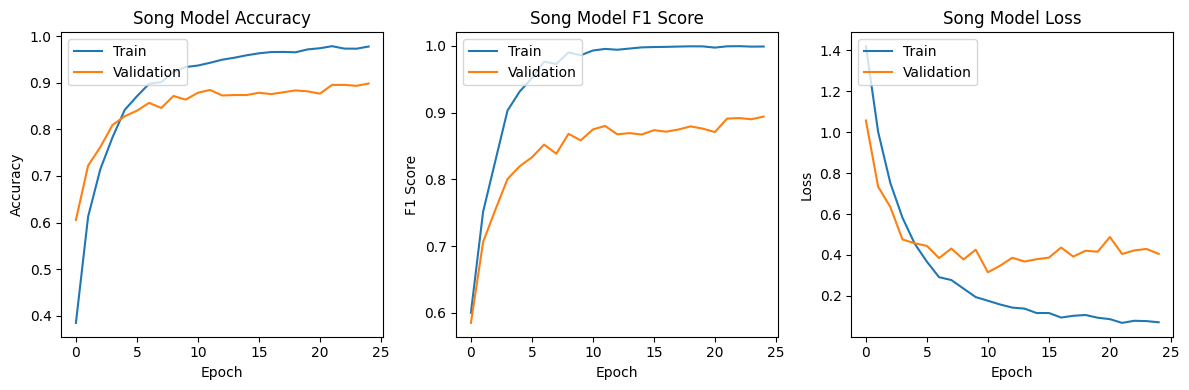

In [ ]:
# Plot accuracy and loss for song model
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 3, 1)
plt.plot(song_history.history['accuracy'])
plt.plot(song_history.history['val_accuracy'])
plt.title('Song Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot F1 score
plt.subplot(1, 3, 2)
plt.plot(song_history.history['f1_score'])
plt.plot(song_history.history['val_f1_score'])
plt.title('Song Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
plt.subplot(1, 3, 3)
plt.plot(song_history.history['loss'])
plt.plot(song_history.history['val_loss'])
plt.title('Song Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


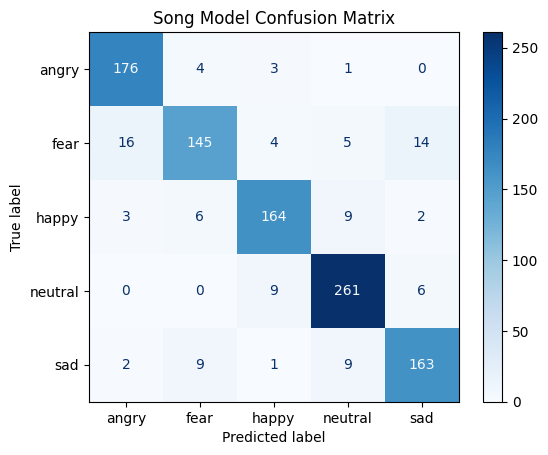

In [ ]:
# Get predictions on the song test set
song_y_pred_probs = song_model.predict([combined_1d_song_test, combined_2d_song_test_reshaped])
song_y_pred = np.argmax(song_y_pred_probs, axis=1)

# Generate the confusion matrix for song data
song_cm = confusion_matrix(song_labels_test_encoded, song_y_pred)

# Get the class labels for song data
song_class_labels = label_encoder_song.classes_

# Display the confusion matrix for song data
song_disp = ConfusionMatrixDisplay(confusion_matrix=song_cm, display_labels=song_class_labels)
song_disp.plot(cmap=plt.cm.Blues)
plt.title('Song Model Confusion Matrix')
plt.show()

In [ ]:
# Save the song model
song_model.save('song_rec_model.h5')
print("Song model saved successfully!")

Song model saved successfully!


In [ ]:
import pickle

# Save speech dataset objects
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

with open('scaler_1d.pkl', 'wb') as f:
    pickle.dump(scaler_1d, f)

with open('scaler_2d.pkl', 'wb') as f:
    pickle.dump(scaler_2d, f)

# Save song dataset objects
with open('label_encoder_song.pkl', 'wb') as f:
    pickle.dump(label_encoder_song, f)

with open('scaler_1d_song.pkl', 'wb') as f:
    pickle.dump(scaler_1d_song, f)

with open('scaler_2d_song.pkl', 'wb') as f:
    pickle.dump(scaler_2d_song, f)

print("Encoder and scaler objects saved successfully!")

Encoder and scaler objects saved successfully!
